In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')

# Load the data
df = pd.read_csv('../data/train_data.csv')

# --- Sanity Check and Cleanup ---

# 1. Standardize column names
# Strip whitespace, convert to lowercase, replace spaces with underscores
original_columns = df.columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Original Columns:", original_columns)
print("Cleaned Columns:", df.columns)


# 2. Display the first few rows and basic info
print("\nDataFrame Head:")
display(df.head())

print("\nDataFrame Info:")
df.info()

Original Columns: Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Cleaned Columns: Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

DataFrame Head:


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,...,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,...,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,...,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2497 non-null   object 
 1   year                             2497 non-null   int64  
 2   status                           2497 non-null   object 
 3   life_expectancy                  2488 non-null   float64
 4   adult_mortality                  2488 non-null   float64
 5   infant_deaths                    2497 non-null   int64  
 6   alcohol                          2333 non-null   float64
 7   percentage_expenditure           2497 non-null   float64
 8   hepatitis_b                      2016 non-null   float64
 9   measles                          2497 non-null   int64  
 10  bmi                              2466 non-null   float64
 11  under_five_deaths                2497 non-null   int64  
 12  pol

In [4]:
df.shape

(2497, 22)

In [2]:
# Get a statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Get a count of missing values for each column, sorted
print("\nMissing Values Count:")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0]) # Only show columns with missing data


Statistical Summary:


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2497.000000,2488.000000,2488.000000,2497.000000,2333.000000,2497.000000,2016.000000,2497.000000,2466.000000,2497.000000,2481.000000,2306.000000,2481.000000,2497.000000,2132.000000,1.957000e+03,2466.000000,2466.000000,2356.000000,2360.000000
mean,2007.479375,69.143770,164.647508,28.987185,4.577008,731.548870,81.008433,2431.130156,38.092863,40.258710,82.419589,5.936544,82.240226,1.699199,7348.579392,1.313189e+07,4.818613,4.863058,0.625069,11.959534
std,4.616338,9.517112,124.080010,107.624711,4.056307,1987.075471,25.107816,11740.711517,20.098019,147.252113,23.703581,2.493682,23.914151,4.898429,14143.733665,6.507472e+07,4.375821,4.484728,0.213123,3.380734
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,3.685949,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,74.000000,0.000000,0.850000,5.347718,77.000000,0.000000,19.100000,0.000000,78.000000,4.252500,78.000000,0.100000,458.064238,1.822860e+05,1.600000,1.525000,0.489750,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.670000,64.398533,92.000000,17.000000,43.000000,4.000000,93.000000,5.750000,93.000000,0.100000,1683.750332,1.354493e+06,3.300000,3.300000,0.676500,12.300000
75%,2011.000000,75.525000,227.000000,22.000000,7.680000,437.105966,96.000000,383.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,5858.119655,7.472819e+06,7.200000,7.200000,0.780000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000



Missing Values Count:
population                         540
hepatitis_b                        481
gdp                                365
total_expenditure                  191
alcohol                            164
income_composition_of_resources    141
schooling                          137
thinness__1_19_years                31
thinness_5_9_years                  31
bmi                                 31
diphtheria                          16
polio                               16
life_expectancy                      9
adult_mortality                      9
dtype: int64


Since the target variable life_expectancy has 9 missing values, I think the best approach would be to drop those rows since 9 is a very small number compared to 2497

In [7]:
df.dropna(subset=['life_expectancy'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2488 non-null   object 
 1   year                             2488 non-null   int64  
 2   status                           2488 non-null   object 
 3   life_expectancy                  2488 non-null   float64
 4   adult_mortality                  2488 non-null   float64
 5   infant_deaths                    2488 non-null   int64  
 6   alcohol                          2325 non-null   float64
 7   percentage_expenditure           2488 non-null   float64
 8   hepatitis_b                      2007 non-null   float64
 9   measles                          2488 non-null   int64  
 10  bmi                              2459 non-null   float64
 11  under_five_deaths                2488 non-null   int64  
 12  polio                    

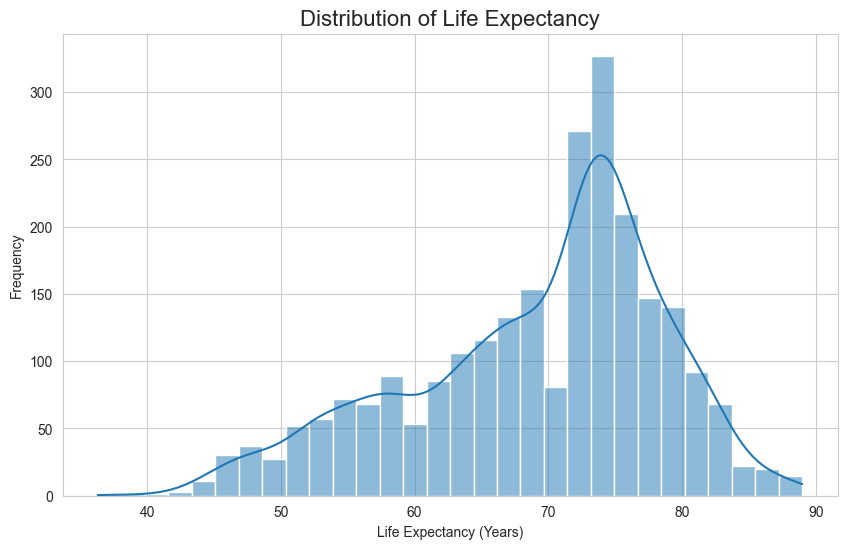

In [9]:
# Analysis of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['life_expectancy'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy', fontsize=16)
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()

['alcohol', 'hepatitis_b', 'bmi', 'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population', 'thinness__1_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']
--- Column: 'alcohol' ---
Skewness: 0.6083



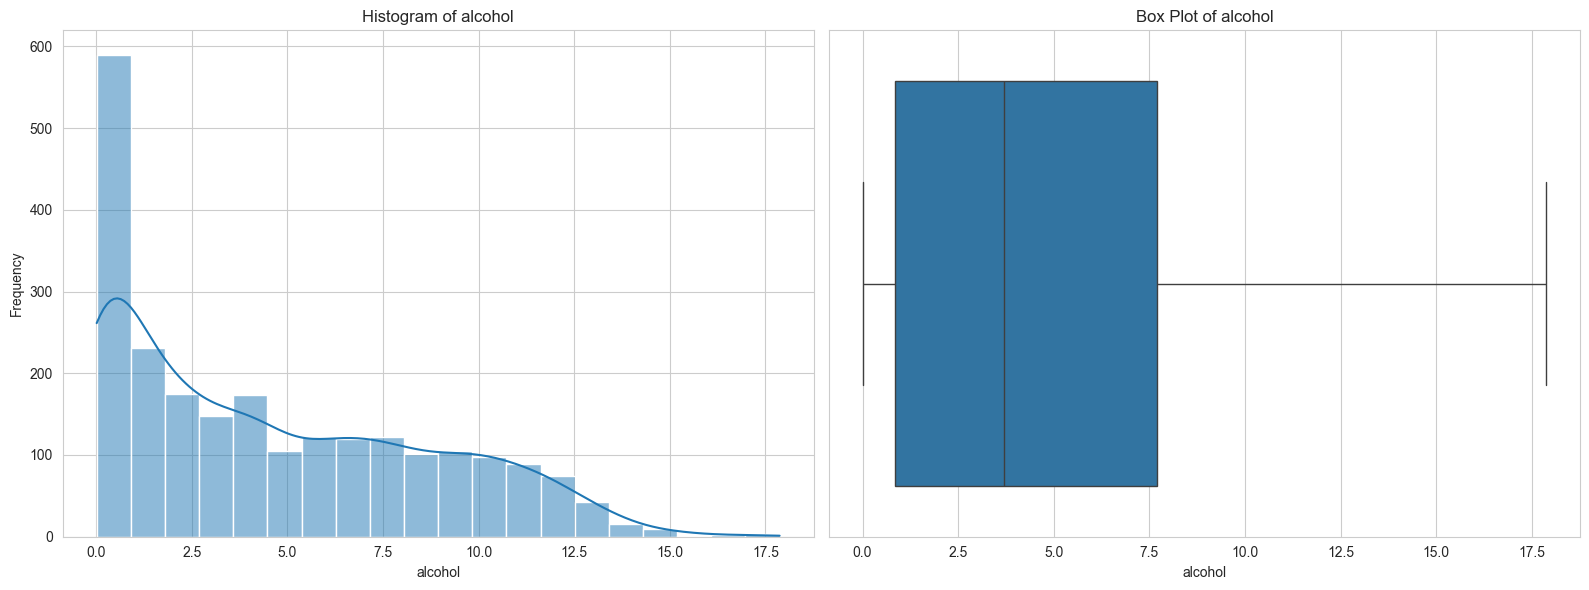

--- Column: 'hepatitis_b' ---
Skewness: -1.9550



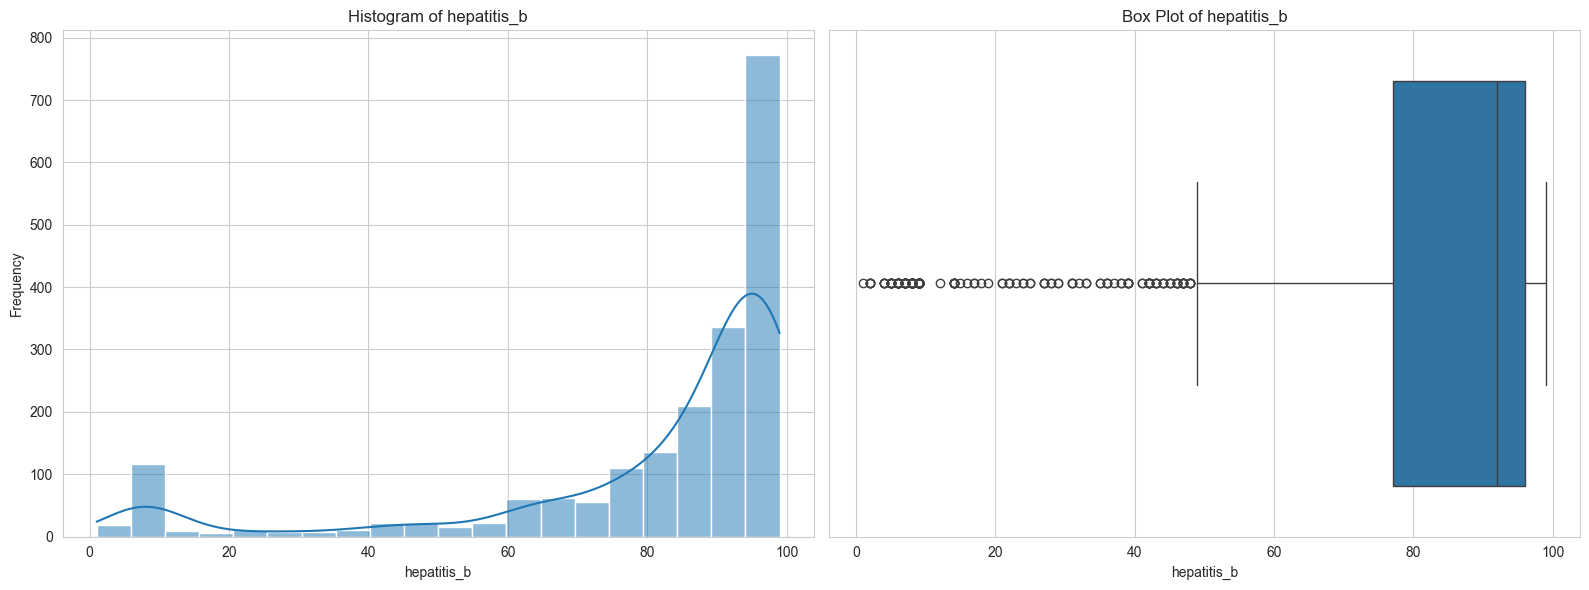

--- Column: 'bmi' ---
Skewness: -0.2175



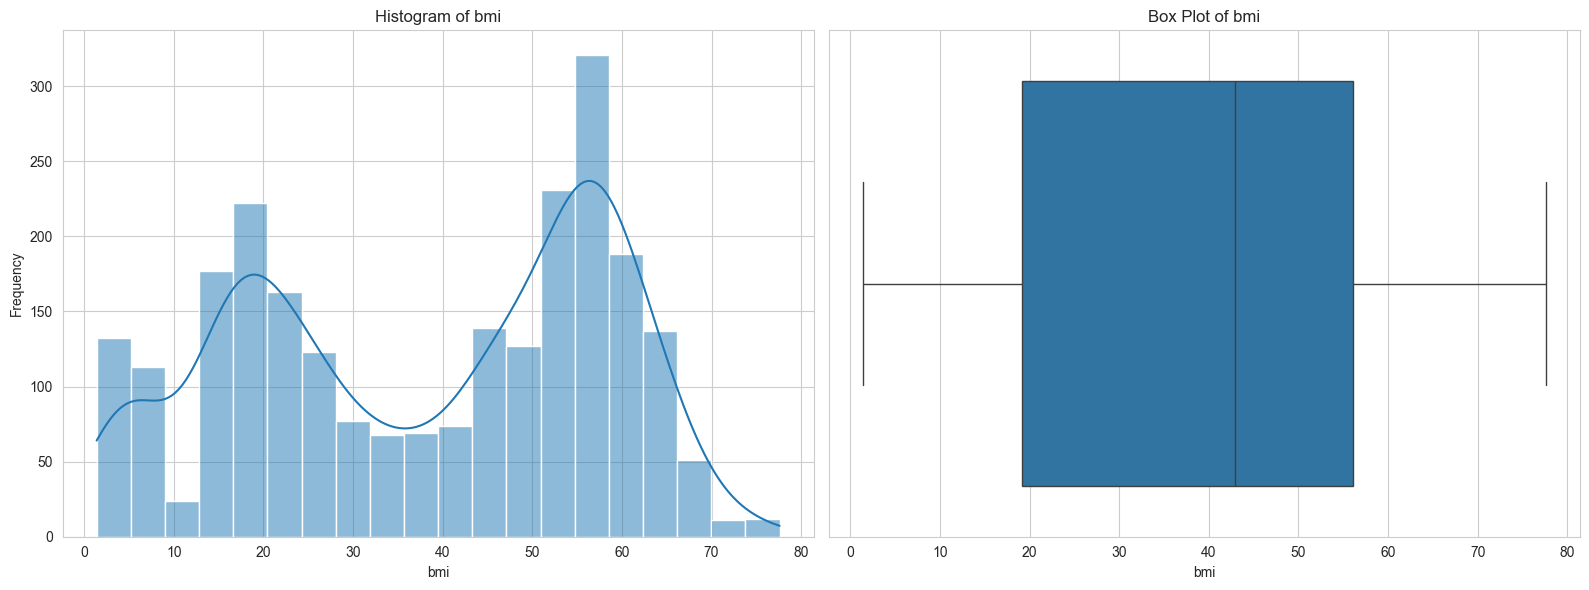

--- Column: 'polio' ---
Skewness: -2.0941



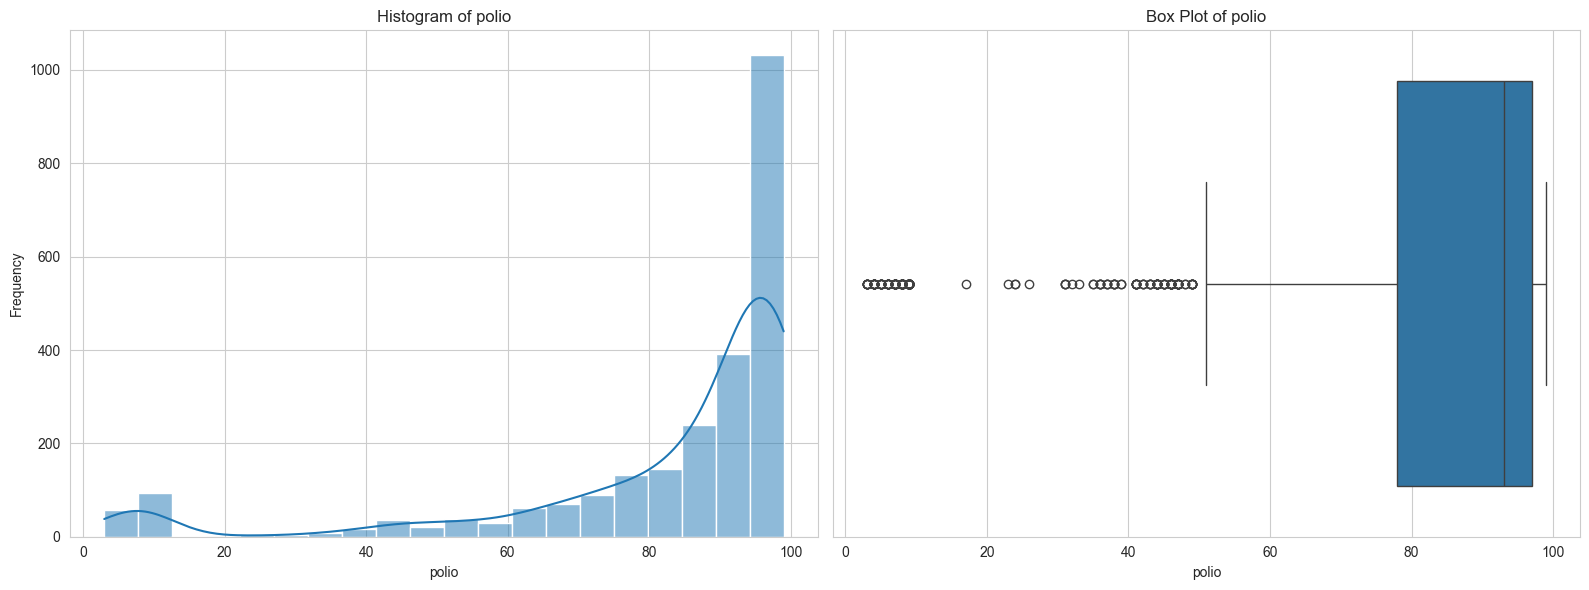

--- Column: 'total_expenditure' ---
Skewness: 0.5598



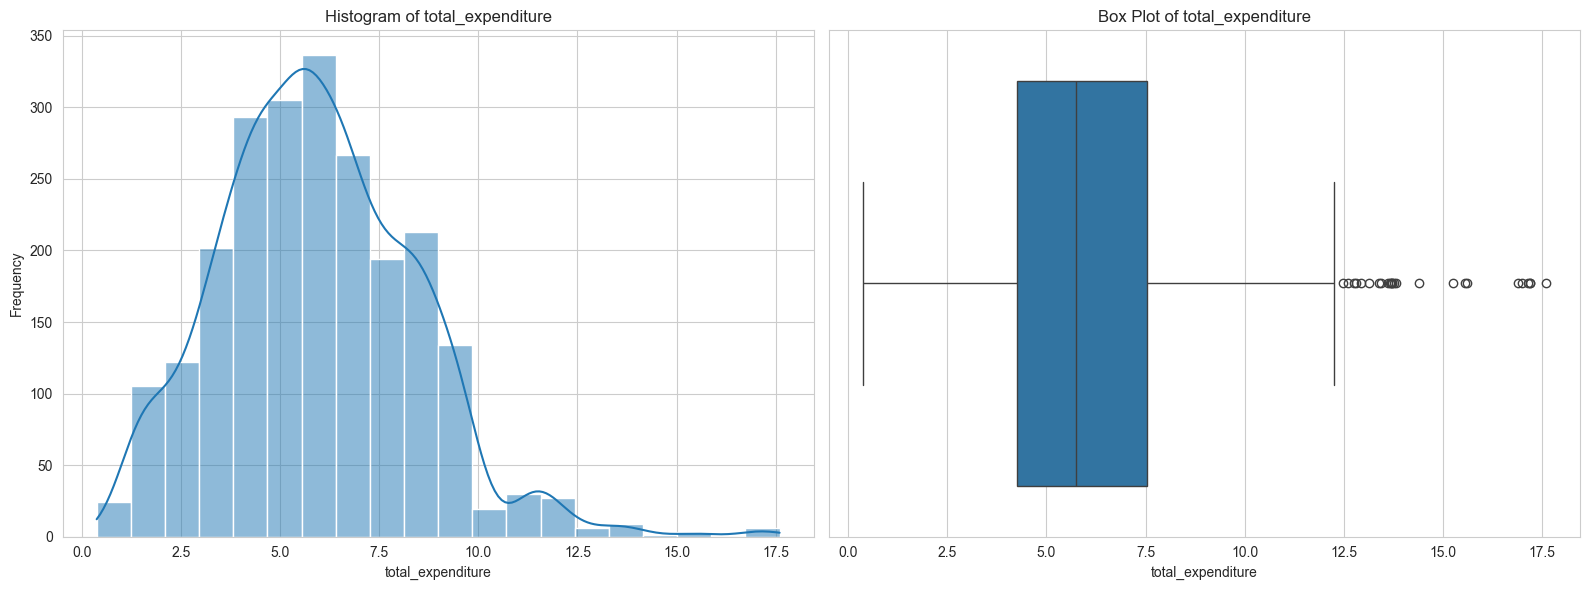

--- Column: 'diphtheria' ---
Skewness: -2.0695



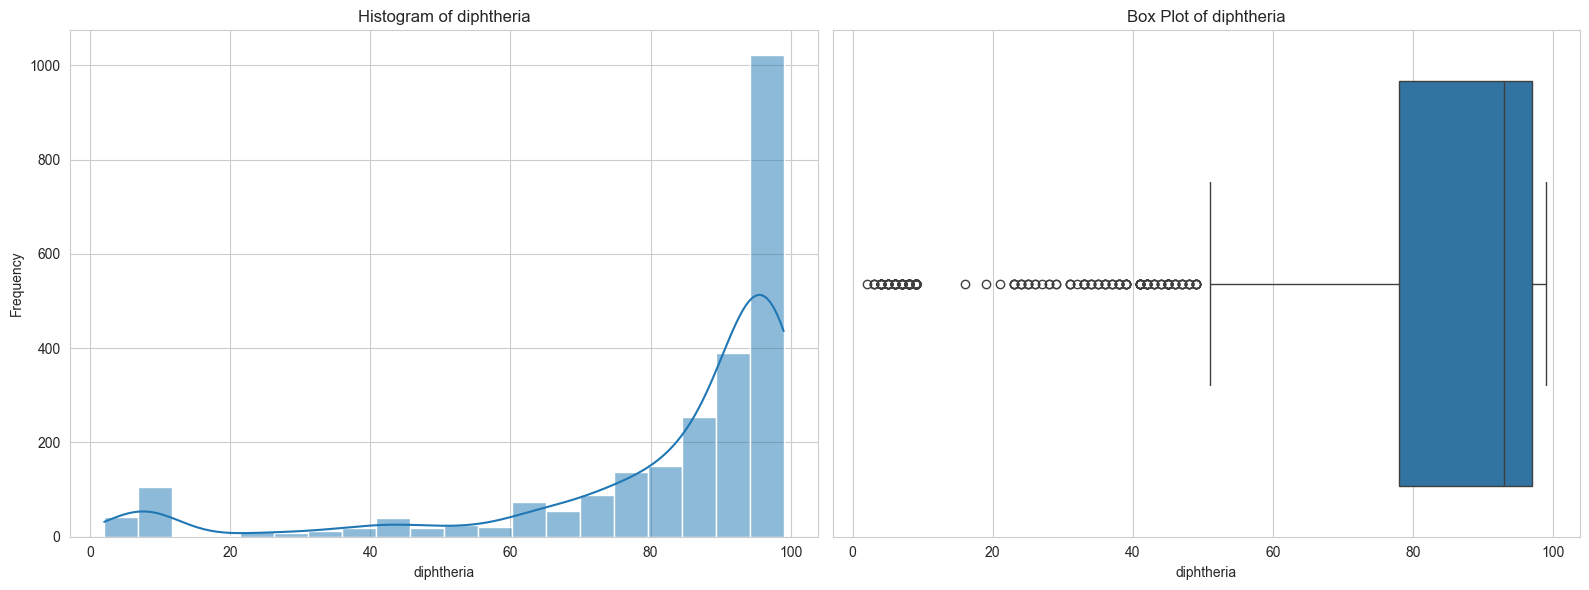

--- Column: 'gdp' ---
Skewness: 3.2293



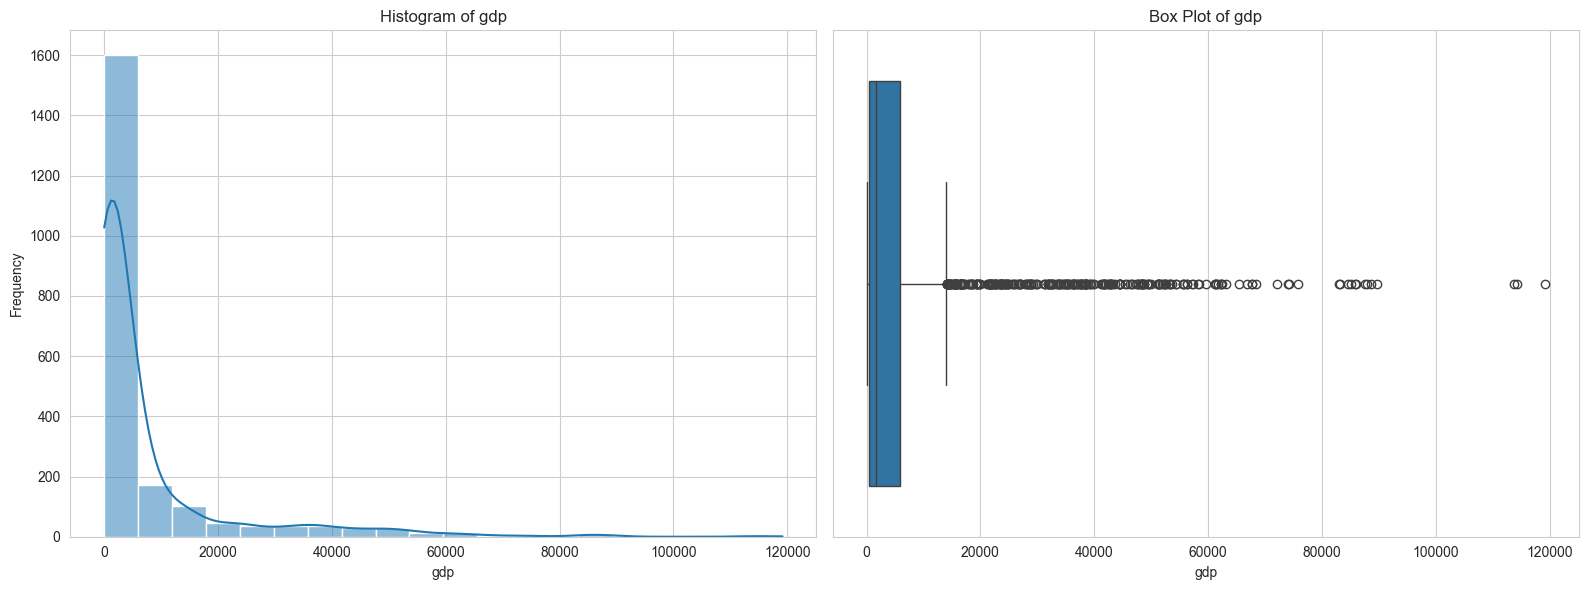

--- Column: 'population' ---
Skewness: 15.2560



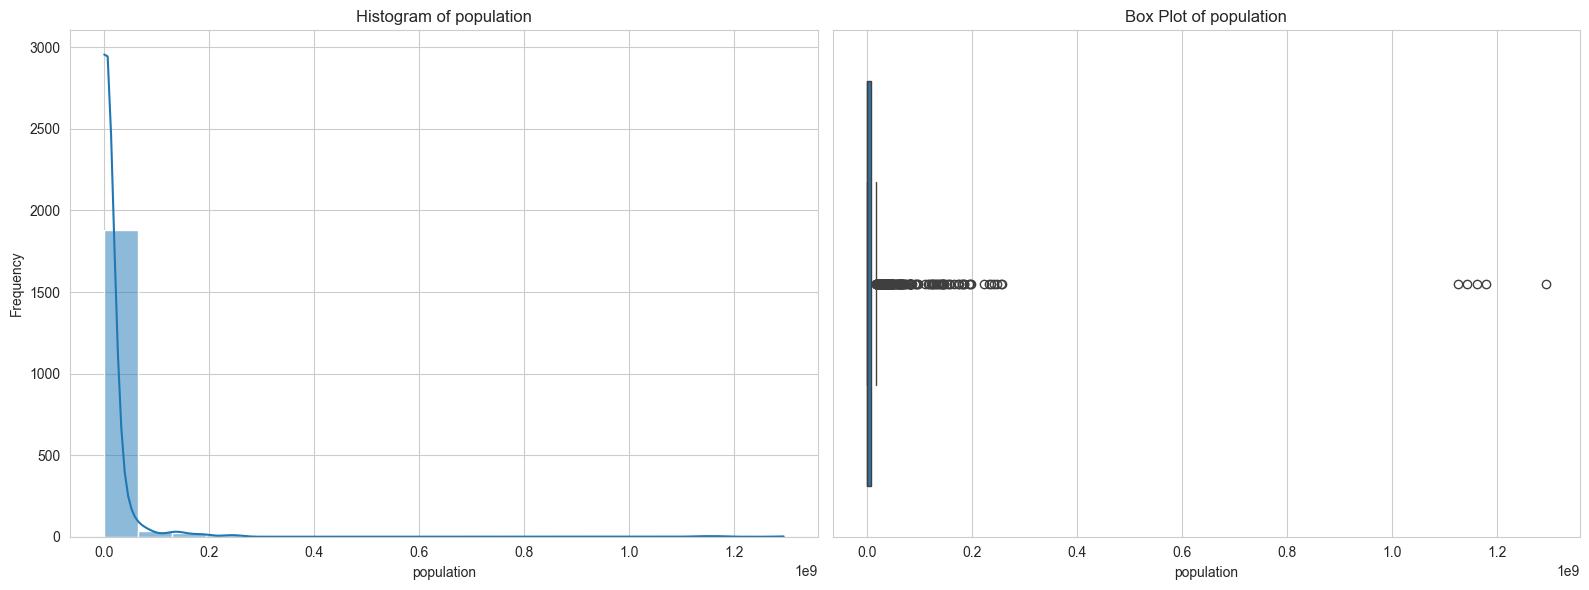

--- Column: 'thinness__1_19_years' ---
Skewness: 1.6897



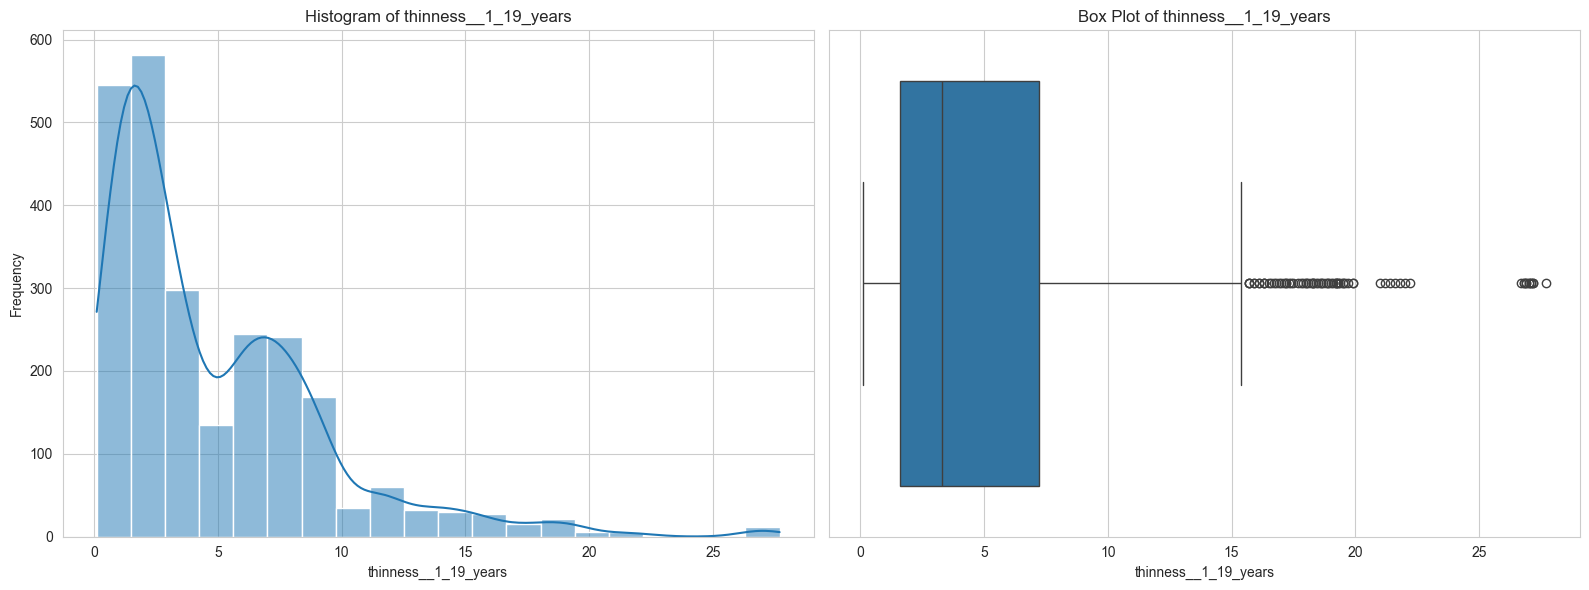

--- Column: 'thinness_5_9_years' ---
Skewness: 1.7542



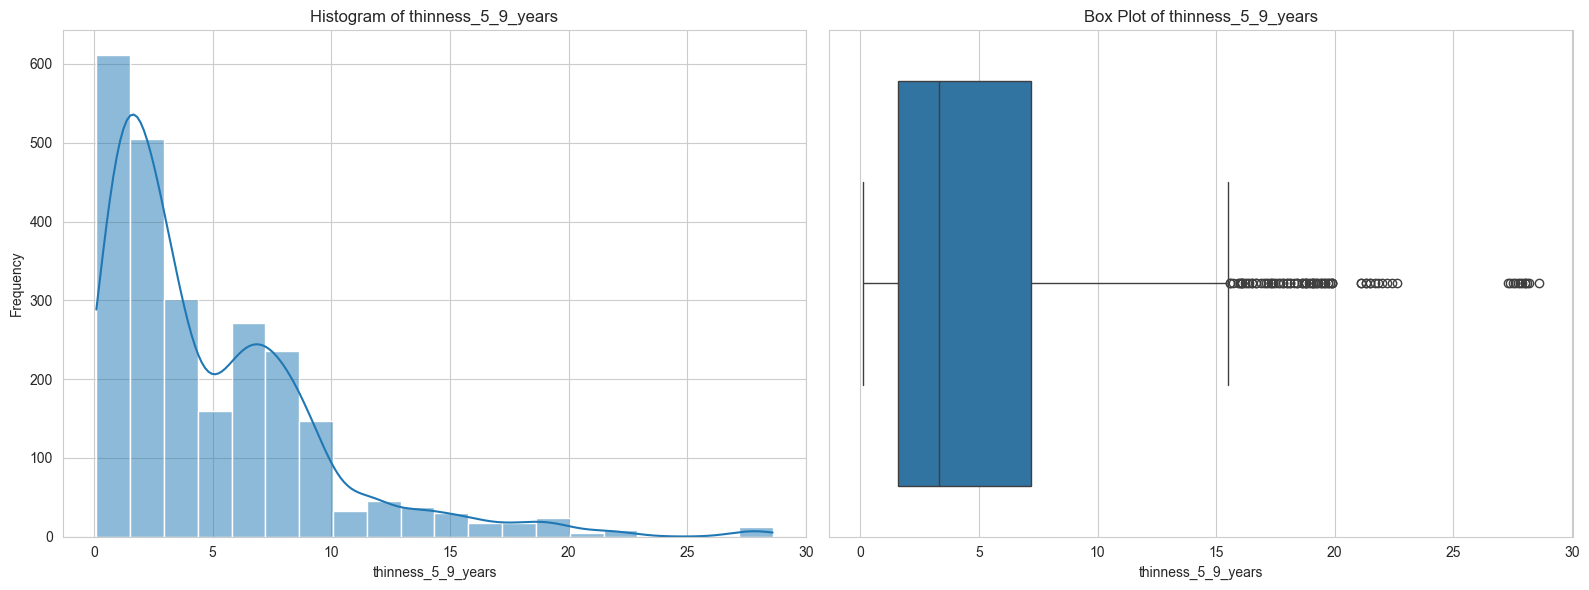

--- Column: 'income_composition_of_resources' ---
Skewness: -1.1284



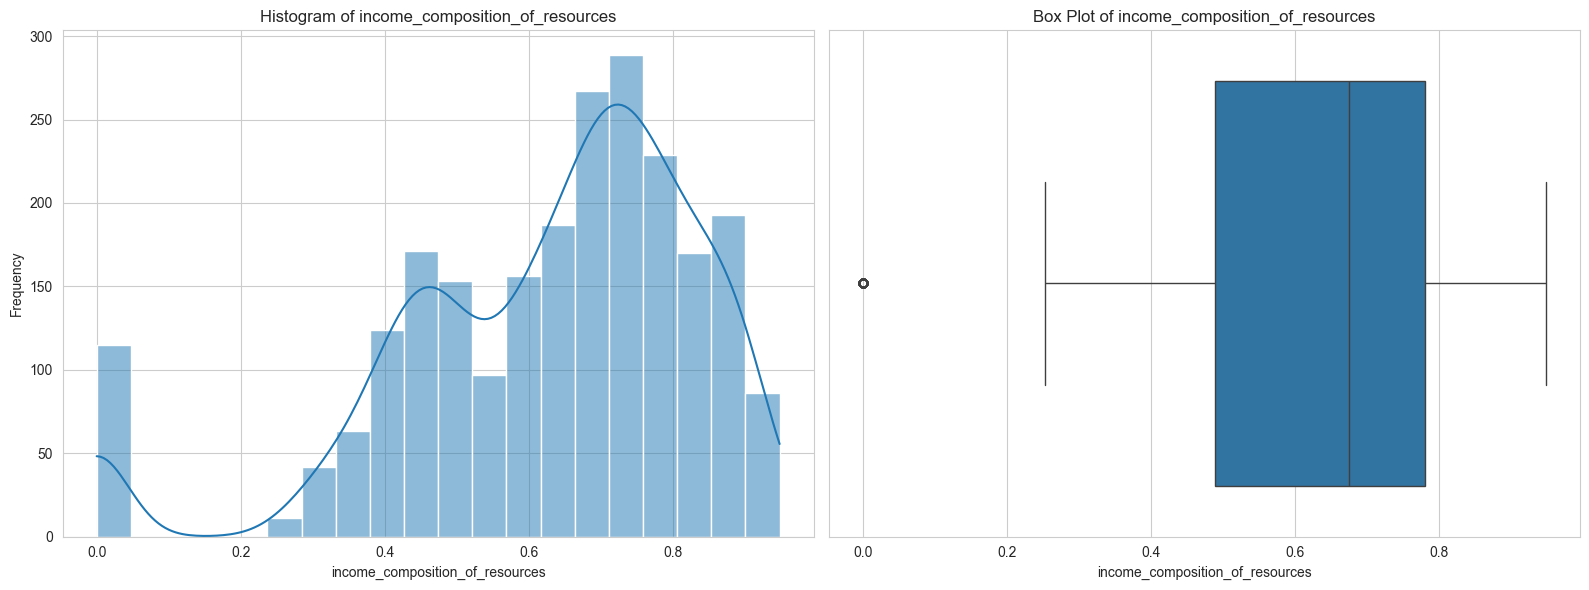

--- Column: 'schooling' ---
Skewness: -0.5639



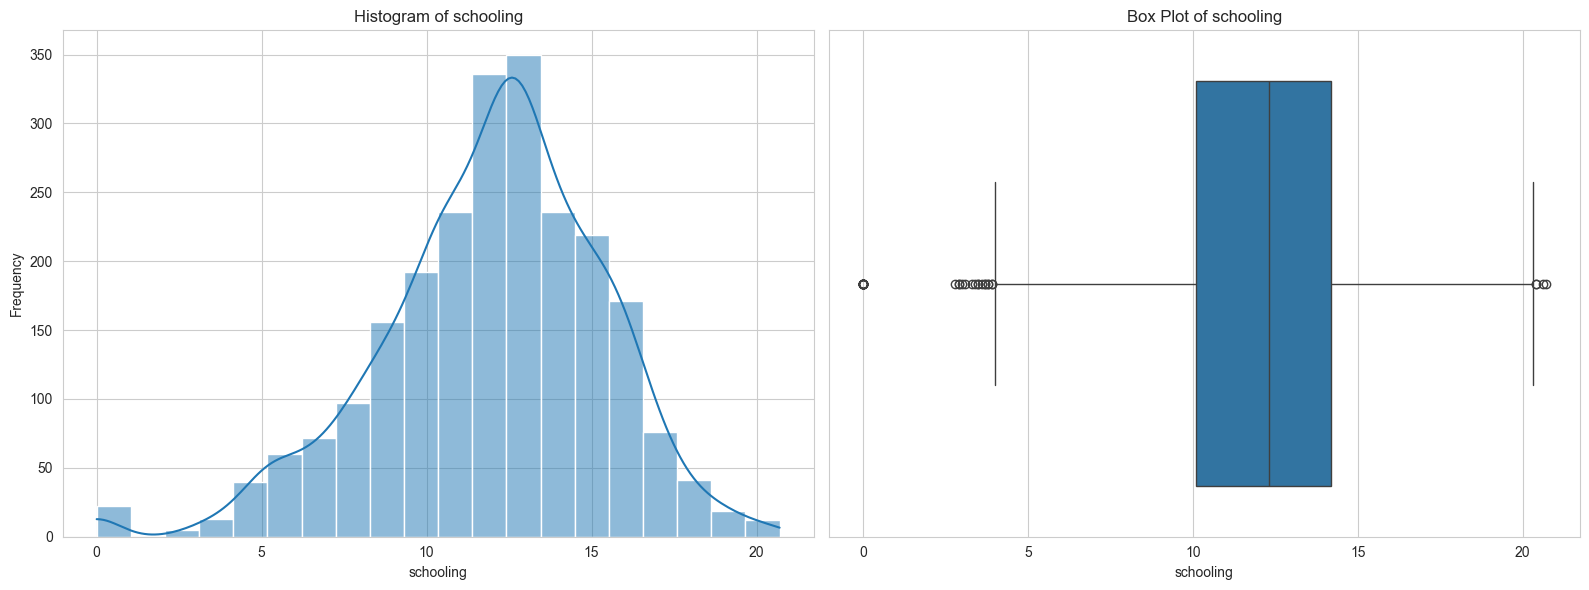

In [ ]:
# Get a new DataFrame containing only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Now, get the columns with any missing values from this new DataFrame
numerical_cols_with_na = numerical_df.columns[numerical_df.isnull().any()].tolist()

print(numerical_cols_with_na)
# Loop through each column, calculate skewness, and create a histogram
for col in numerical_cols_with_na:
    # Remove NaN values for skewness calculation and plotting to avoid errors
    data_for_analysis = df[col].dropna()

    # Calculate skewness
    skewness = data_for_analysis.skew()

    print(f"--- Column: '{col}' ---")
    print(f"Skewness: {skewness:.4f}\n")

     # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the histogram on the left subplot
    sns.histplot(data_for_analysis, kde=True, bins=20, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    
    # Plot the box plot on the right subplot
    sns.boxplot(x=data_for_analysis, ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    
    plt.show()

Given the great skewness among the data, i think its best to replace the missing value of theese features with median of the data. Schooling and bmi can be an exception as the show skewness are approximately between -0.5 - 0.5 and can be replaced with mean. 

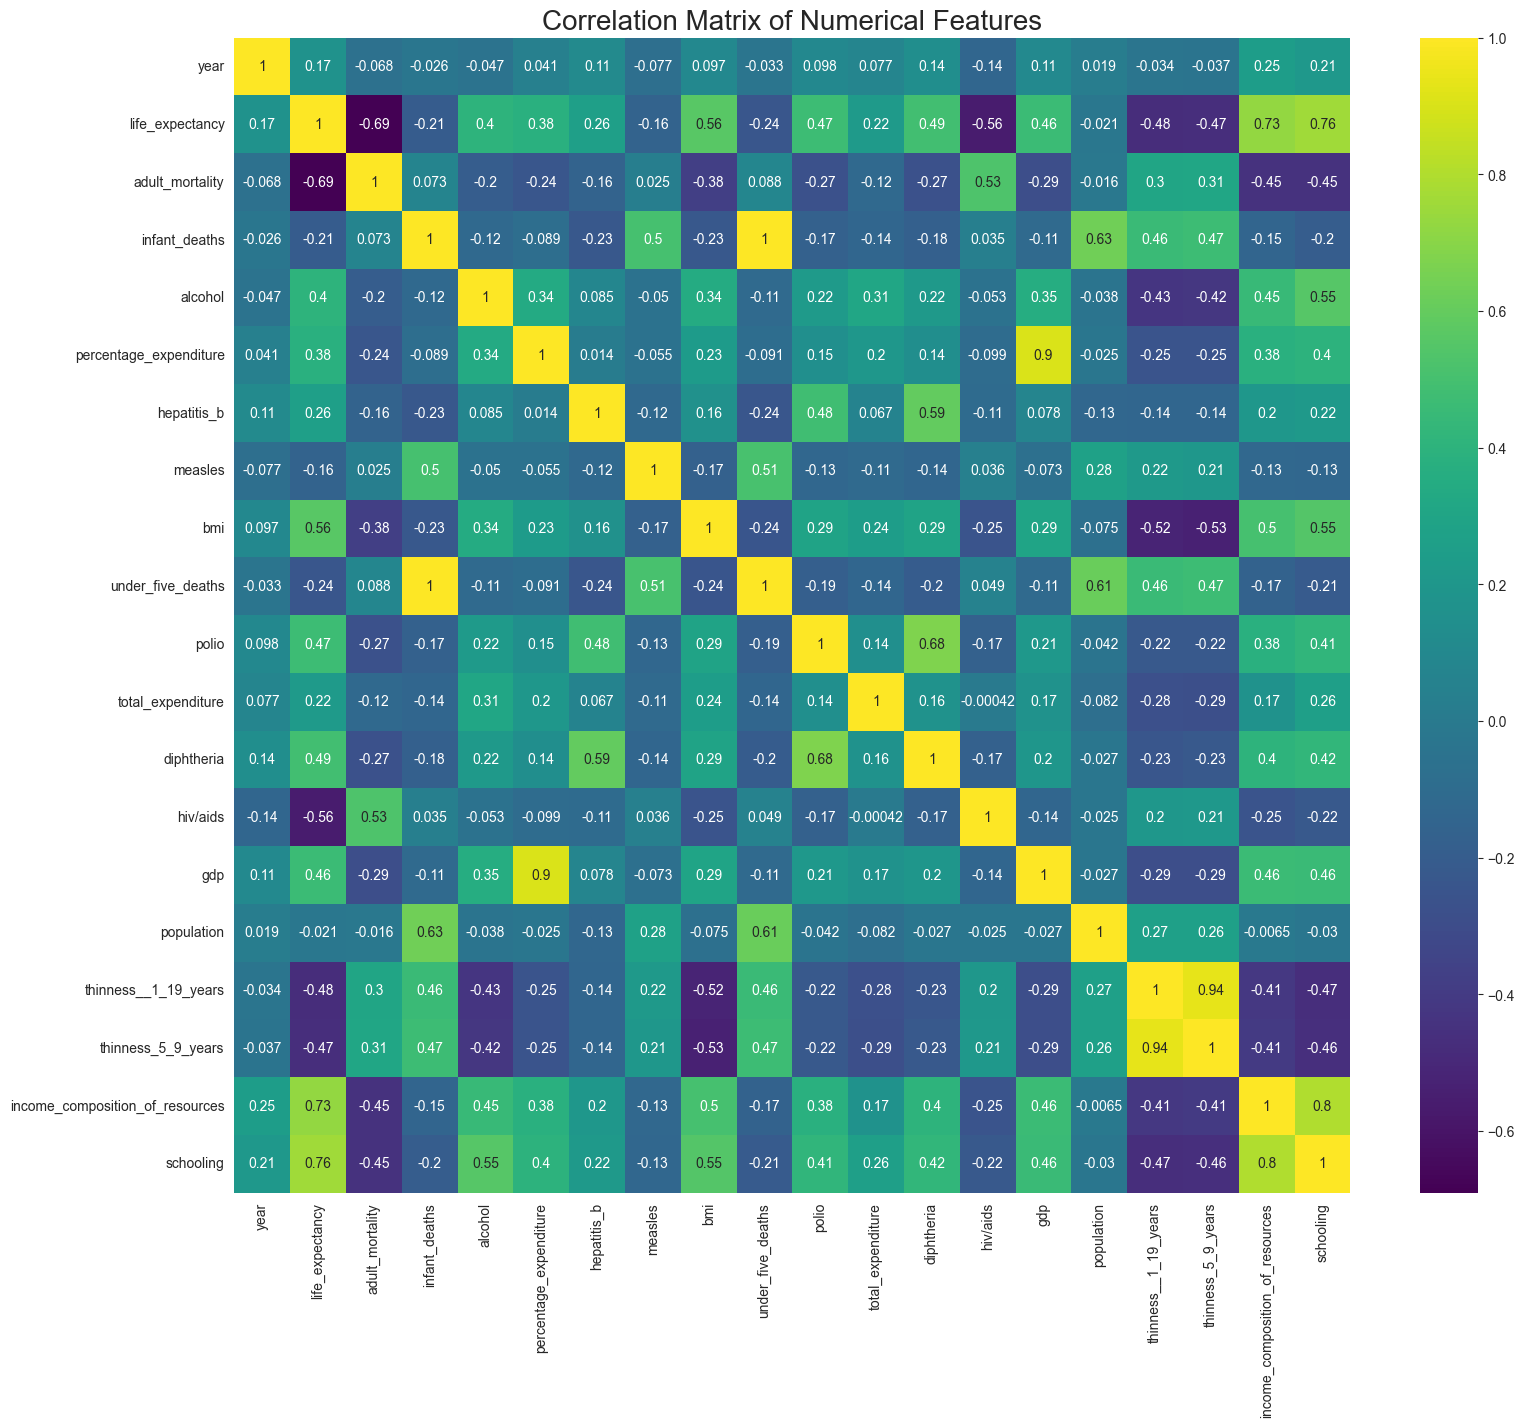


Correlations with Life Expectancy:
life_expectancy                    1.000000
schooling                          0.755890
income_composition_of_resources    0.726317
bmi                                0.563363
diphtheria                         0.485069
polio                              0.467687
gdp                                0.462088
alcohol                            0.402042
percentage_expenditure             0.381986
hepatitis_b                        0.255634
total_expenditure                  0.223340
year                               0.168648
population                        -0.021165
measles                           -0.161178
infant_deaths                     -0.207532
under_five_deaths                 -0.235205
thinness_5_9_years                -0.470651
thinness__1_19_years              -0.476842
hiv/aids                          -0.559350
adult_mortality                   -0.690212
Name: life_expectancy, dtype: float64


In [18]:
# Calculate the correlation matrix for numerical features
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()

# Display correlations with the target variable
print("\nCorrelations with Life Expectancy:")
print(corr_matrix['life_expectancy'].sort_values(ascending=False))

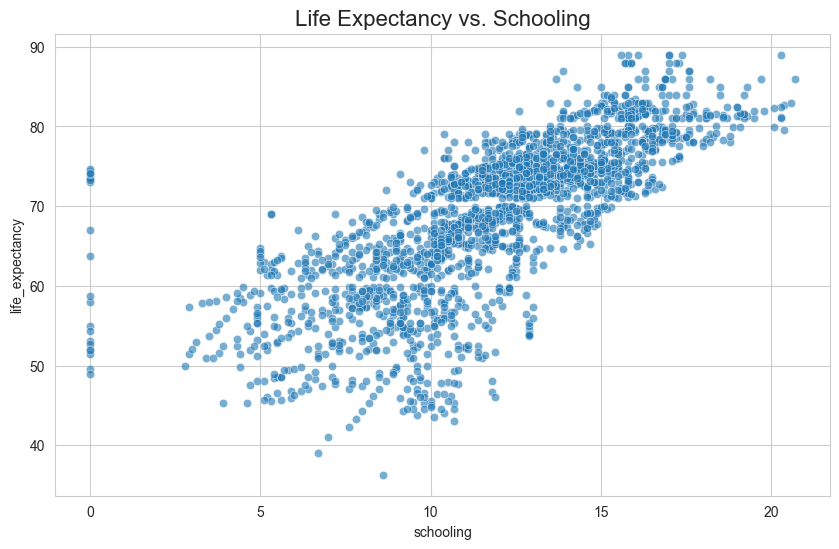

In [20]:
# Scatter plot of life expectancy vs. schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='schooling', y='life_expectancy', data=df, alpha=0.6)
plt.title('Life Expectancy vs. Schooling', fontsize=16)
plt.show()

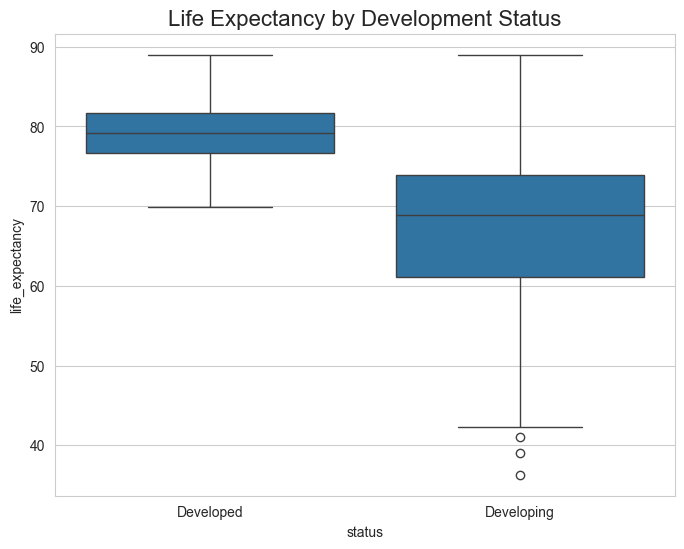

In [ ]:
# Box plot of life expectancy by development status
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='life_expectancy', data=df)
plt.title('Life Expectancy by Development Status', fontsize=16)
plt.show()

/var/folders/k7/dwv5jzgn1ws98rfkc1j430300000gn/T/ipykernel_91366/2996275275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_mean.values, y=country_mean.index, palette="viridis")


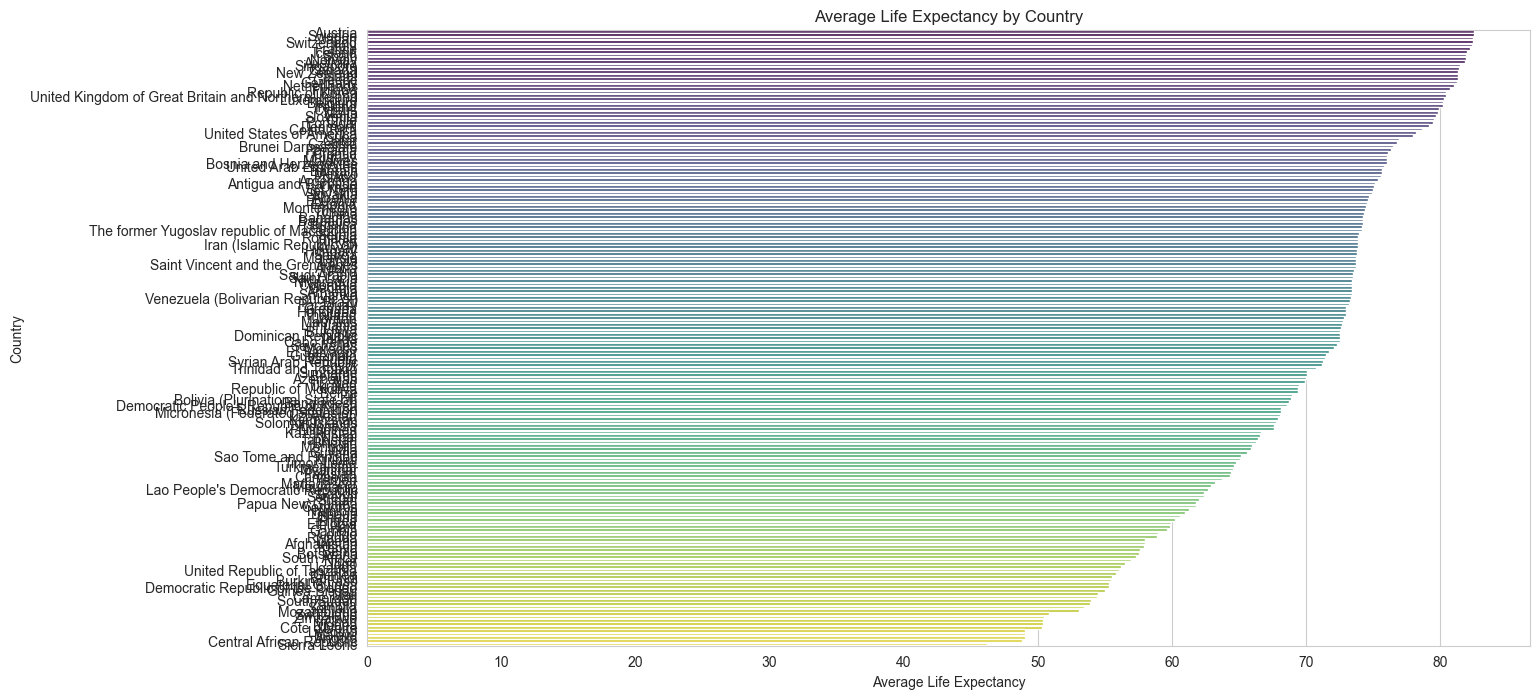

In [30]:
country_mean = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)
country_mean.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=country_mean.values, y=country_mean.index, palette="viridis")
plt.title('Average Life Expectancy by Country')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country')
plt.show()

Average Life Expectancy by Status:
status
Developed     79.131808
Developing    67.015651
Name: life_expectancy, dtype: float64


/var/folders/k7/dwv5jzgn1ws98rfkc1j430300000gn/T/ipykernel_91366/3330931240.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_le_mean.index, y=status_le_mean.values, ax=axes[0], palette='viridis')
/var/folders/k7/dwv5jzgn1ws98rfkc1j430300000gn/T/ipykernel_91366/3330931240.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='life_expectancy', data=df, ax=axes[1], palette='viridis')


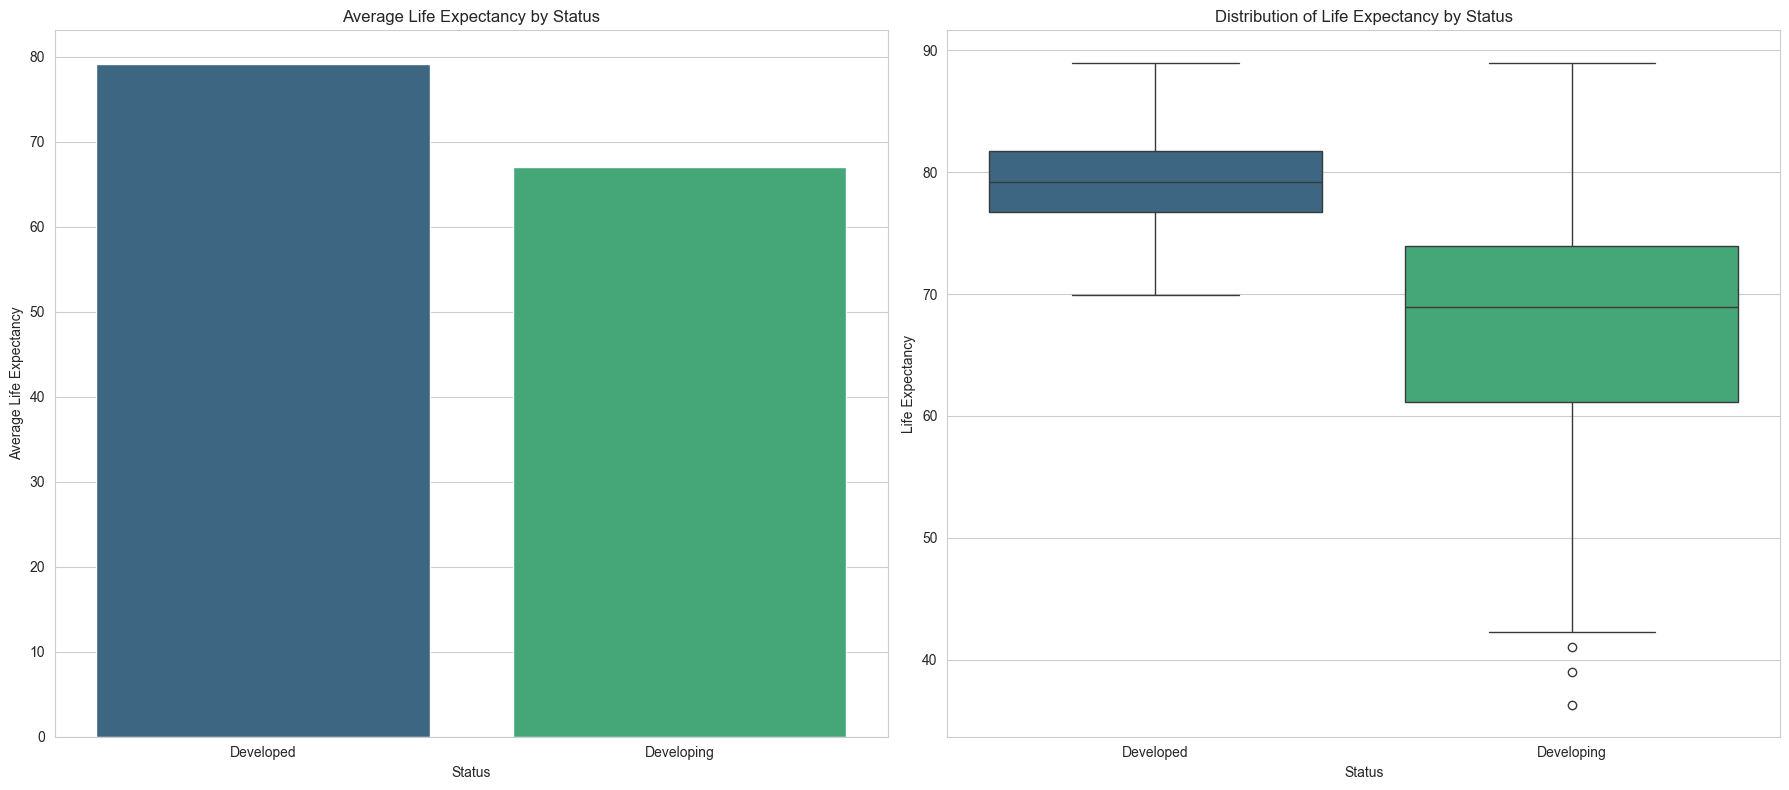

In [32]:
status_le_mean = df.groupby('status')['life_expectancy'].mean().sort_values(ascending=False)
    
print("Average Life Expectancy by Status:")
print(status_le_mean)

# Create subplots to show both the mean and the distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Bar plot of the mean
sns.barplot(x=status_le_mean.index, y=status_le_mean.values, ax=axes[0], palette='viridis')
axes[0].set_title('Average Life Expectancy by Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Average Life Expectancy')
# Plot 2: Box plot to show distribution and outliers
sns.boxplot(x='status', y='life_expectancy', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Life Expectancy by Status')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Life Expectancy')

plt.tight_layout()
plt.show()